Task 1: Build and analyse the performance of multiple ML models (15%)

Task 2: Interpret your models (20%)

Task 3: Error analysis (30%)

Task 4: What-if? (15%)

Task 5: Insightful documentation for the dataset and your most fair model (20%)

#### To build a credit score application, we want to make sure first that 
- they understand the dataset well, 
- the models it leads to, and 
- the potential biases.


 - The idea is to analyse potential biases caused by different variables that reflects on the income of people, as credit score is highly based on income-band of people.
 
- Method 1: Analyse the exact available data without any manipulation
 1. Check the amount of data available for each of the protected categories in the dataset.
 2. Check how different protected variables share a consistent strong correlation with income-band.
 
- Method 2: Manipulate the data with various pluasible ideal version of datasets
 1. Check if removing certain protected features makes a positive or negative difference to the income band people lie in as comapared to inculsion of the varibles

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt

In [157]:
Labels = ['Age','Workclass','fnlwgt','Education','Education_num','Marital_status','Occupation','Relationship','Race','Sex',
          'Capital_gain','Capital_loss','Hours_per_week','Native_country','Income_band']

path   =  "/Users/alvis/Downloads/adult.data"

data = pd.read_csv(path, names = Labels, skipinitialspace=True) 
data.head()

,Age,Workclass,fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income_band
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Side Note: 
    1. The gender category contains only 2 genders. (could be because the data collected is from 1996 or older. Other genders were not considered mainstream)
   

In [195]:
adult_data = data.drop("Education", axis=1)

#### Step 1: Data Preprocesing

- Check for outliers.
- Check for missing values.
- Instead of dropping missing values, we would mask the missing values to avoid losing any hidden information.


In [189]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education_num   32561 non-null  int64 
 4   Marital_status  32561 non-null  object
 5   Occupation      32561 non-null  object
 6   Relationship    32561 non-null  object
 7   Race            32561 non-null  object
 8   Sex             32561 non-null  object
 9   Capital_gain    32561 non-null  int64 
 10  Capital_loss    32561 non-null  int64 
 11  Hours_per_week  32561 non-null  int64 
 12  Native_country  32561 non-null  object
 13  Income_band     32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [169]:
# Find unique values of all categorical features:

print(f'Unique Income_band values are: {adult_data.Income_band.unique()}\n')
print(f'Unique Workclass values are: {adult_data.Workclass.unique()}\n')
print(f'Unique Marital_status values are: {adult_data.Marital_status.unique()}\n')
print(f'Unique Occupation values are: {adult_data.Occupation.unique()}\n')
print(f'Unique Relationship values are: {adult_data.Relationship.unique()}\n')
print(f'Unique Race values are: {adult_data.Race.unique()}\n')
print(f'Unique Sex values are: {adult_data.Sex.unique()}\n')
print(f'Unique Native_country values are: {adult_data.Native_country.unique()}')


Unique Income_band values are: ['<=50K' '>50K']

Unique Workclass values are: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Unique Marital_status values are: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Unique Occupation values are: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

Unique Relationship values are: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

Unique Race values are: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

Unique Sex values are: ['Male' 'Female']

Unique Native_country values are: ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'C

- By looking at other values, we notice that Workclass have a value '?' which is considered to be as 'Native_origin not known.'
- Native_origin have odd values like - '?', 'South', 'Hong'
- In Relationship values, there is 'unmarried' which seems like an odd value


### Recast the varible values which have almost similar categories that do not contribute much to our study when studies individually.

From above, we can see that there are many values in each variable, that can be clubbed together to see a clearer impact of bias in our data.
This classification again, can still hold some bias of the individual defining these classes,but since we are grouping with the intention of identifying biases in the society, we assume that the bias in the grouping is unimportant for now.

We do recasting for variables we feel are sensitive - Race, Sex, Native-country,.



Reference: World Bank List  of economies 2022

1. High-Income : United States, Europe, Central Asia (United-States, Germany, ireland, italy, canada, Puerto-Rico, Japan, England, Hong-Kong, Portugal, Poland, Outlying-US(Guam-USVI-etc), Trinadad&Tobago, Greece, France, Scotland, Hungary, Holand-Netherlands
2. Upper-Middle Income : Latin America and Caribbean (Mexico, colombia, Guatemala, Jamaica, Dominica-Republic, Cuba, China, Thailand, Ecuador, Yugoslavia, Peru
3. Lower-Middle Income : East Asia & Pacific, Middle-East & North Africa (Philippines, Haiti, Nicaragua, India, Vietnam, Iran, Combodia, El-Salvador, Honduras, Laos
4. Low Income : South Asia, Sub-Saharan Africa
5. Not Classified : Taiwan


In [196]:

adult_data['Race'] = ['White' if i=='White' else 'Non-White' for i in adult_data['Race']]

adult_data['Sex'] = ['Male' if j=='Male' else 'Female' for j in adult_data['Sex']] #Apparently we only have 2 sex in our dataset


In [ ]:
#### Series.astype(original_dtype) to get the astype codes to oroginal values

In [197]:
pd.options.mode.chained_assignment = None 

High_Income =['United-States', 'Germany', 'Ireland', 'Italy', 'Canada', 'Puerto-Rico', 'Japan', 'England', 'Hong', 'Portugal', 'Poland', 'Outlying-US(Guam-USVI-etc)','Trinadad&Tobago','Greece', 'France', 'Scotland', 'Hungary','Holand-Netherlands']
Upper_Middle_Income = [ 'Mexico', 'Columbia', 'Guatemala', 'Jamaica', 'Dominican-Republic', 'Cuba', 'China', 'Thailand', 'Ecuador', 'Yugoslavia', 'Peru']
Lower_Middle_Income = ['Philippines', 'Haiti', 'Nicaragua', 'India', 'Vietnam', 'Iran', 'Cambodia', 'El-Salvador', 'Honduras', 'Laos']
Not_Classified = ['Taiwan', '?', 'South']

adult_data['Native_country']  = adult_data.Native_country.replace(High_Income,'High_Income')
adult_data['Native_country']  = adult_data.Native_country.replace(Upper_Middle_Income,'Upper_Middle_Income')
adult_data['Native_country']  = adult_data.Native_country.replace(Lower_Middle_Income,'Lower_Middle_Income')
adult_data['Native_country']  = adult_data.Native_country.replace(Not_Classified,'Not_Classified')



In [199]:
# Encoding categorical columns in numeric terms

adult_data['Workclass'] = adult_data.Workclass.astype('category').cat.codes
adult_data['Marital_status'] = adult_data.Marital_status.astype('category').cat.codes
adult_data['Occupation'] = adult_data.Occupation.astype('category').cat.codes
adult_data['Relationship'] = adult_data.Relationship.astype('category').cat.codes
adult_data['Race'] = adult_data.Race.astype('category').cat.codes
adult_data['Sex'] = adult_data.Sex.astype('category').cat.codes
adult_data['Native_country'] = adult_data.Native_country.astype('category').cat.codes
adult_data['Income_band'] = adult_data.Income_band.astype('category').cat.codes

In [200]:
adult_data_input = adult_data.drop(['Income_band'],axis=1)
adult_data_output = adult_data['Income_band']

In [202]:
X_train,X_test,y_train,y_test = train_test_split(adult_data_input,adult_data_output, test_size=0.33) #Data has been split randomly with shuffle on, so that fairness in data selection can be maintained

In [201]:
%store adult_data

Stored 'adult_data' (DataFrame)


### Plotting Protected Variables to establish representation of various sections of society in the dataset

In [14]:
# ## From Applied AI lab, used to plot multiple varibles in a single plots

# fig, axes = plt.subplots(3, 5, figsize=(20, 10))
# for i, ax in enumerate(axes.ravel()):
#     if i > 12:
#         ax.set_visible(False)
#         continue
#     ax.plot(X[:, i], y, 'o', alpha=.5)
#     ax.set_title("{}: {}".format(i, boston.feature_names[i]))
#     ax.set_ylabel("PRICE")
# plt.show()

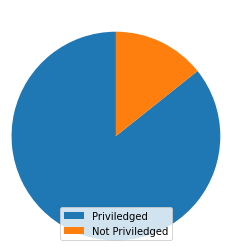

In [15]:
race_counts = dataset_protected['Priviledged_Race'].value_counts()
race_labels = race_counts.index
plt.pie(race_counts,startangle=90, radius = 1.2 )
plt.legend(race_labels,loc=8, fontsize=10)
plt.title('Race',size=20, color='White')
plt.show()


income_band_counts = adult_data_train['Income_band'].value_counts()
income_band_labels = income_band_counts.index



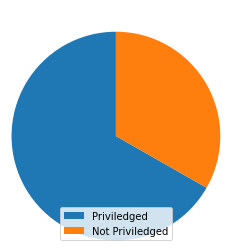

In [16]:
sex_counts = dataset_protected['Priviledged_Sex'].value_counts()
sex_labels = sex_counts.index
plt.pie(sex_counts,startangle=90, radius = 1.2 )
plt.legend(sex_labels,loc=8, fontsize=10)
plt.title('Sex',size=20, color='White')
plt.show()

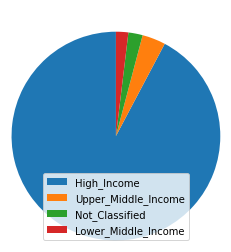

In [17]:
native_country_counts = dataset_protected['Native_country_group'].value_counts()
native_country_labels = native_country_counts.index
plt.pie(native_country_counts,startangle=90, radius = 1.2)
plt.legend(native_country_labels,loc=8, fontsize=10);
plt.title('Native-Country',size=20, color='White')
plt.show()


In [ ]:
We first use of features to train a classifier model (Decision Trees and Logistic Classifier, then use the below metrics to analyse the behaviour )


### Prevalence as in indicator of bias: It is the fraction of the observations that are positive
 
 Metrics to compare prevalance:
 1. Accuracy - Fraction predicted correctly
 2. Recall/Sensitivity - Fraction of positives predicted correctly 
 3. Specificity - Fraction of negatives predicted correctly 
 4. Precision - Fraction of predicted positives that are actually positive  
 
Reference: https://towardsdatascience.com/data-science-performance-metrics-for-everyone-4d68f4859eef






Approach: https://ocw.mit.edu/courses/res-ec-001-exploring-fairness-in-machine-learning-for-international-development-spring-2020/pages/module-three-framework/

- Identify senstive variables that can potentially cause bias (e.g.race, religion, national origin, gender, marital status, age, and socioeconomic status. 


Fairness starts with training dataset:
1. The training data may not reprsent all the groups
2. Past data may not be in-line with current events or misinterpretaion of past events may happen (called selective perception)
3. Hidden correlations in input data could lead to bias, e.g. b/w a protected variable and the predictor
4. Fainess through unawareness could help, but it could still perpetuate bias if the protected variables are correlated to other attributes of the data. So we could remove protected variables from our data, but would still include bias indirectly through other variables correlated to those protected variables.

- For ordinal data i.e. data that has orderly values but distance between values is unquantified, Label Encoding is more suitable.
- For non-ordinal data, One-hot-Encoding is more suitable.

- Continuous Features: age, fnlwgt, capital-gain, capital-loss, hours-per-week
- Categorical-Ordinal Features: income-band
- Categorical-NonOrdinal Features: workclass,education, education-num, marital-status,occupation, relationship, race,sex,native-country

In [ ]:
# # Step 2: Encode categorical variables for ease of analysis:
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import OrdinalEncoder

# Continuous_Features = ['age','fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

# Categorical_NonOrdinal_Features = ['workclass','education-num','marital-status','occupation','relationship','race','sex','native-country']

# Categorical_Ordinal_Features  = ['income-band']


# # Label Encoding for Categorical_Ordinal_Features
# # One Hot Encoding for Categorical_NonOrdinal_Features


# Categorical_NonOrdinal_Feature_transform = Pipeline(steps=[('OneHotEncoding', OneHotEncoder(sparse_output=False, handle_unknown="ignore")),])
# Categorical_Ordinal_Feature_transform    = Pipeline(steps=[("LabelEncoder"  , OrdinalEncoder()),])

# ColTrans = ColumnTransformer(transformers=[("Categorical_OneHotEncoding", Categorical_NonOrdinal_Feature_transform, Categorical_NonOrdinal_Features),
#                                            ("Categorical_LabelEncoder"  , Categorical_Ordinal_Feature_transform   , Categorical_Ordinal_Features),])


# transformed_adult_data_train = ColTrans.fit_transform(adult_data_train)
# transformed_adult_data_train.shape

# df = pd.DataFrame(transformed_adult_data_train)
# df

#### We replace categorical values with numerical values using replace values method. We could also use more technical methods like OneHotEcoding or Label Encoder. But that makes it a bit tricky to plot correlation of all variables in one graph. So, for the sake of smplicity, we use choose to use simple replace values method

In [28]:
# Define a replace method 




# # Convert categorical features to numerical using one-hot encoding
# categorical_columns = ['Workclass_coded', 'Marital_status_coded', 'Occupation_coded', 'Relationship_coded', 'Race_coded', 'Sex_coded', 'Native_country_coded']
# adult_data_train = pd.get_dummies(adult_data_train, columns=categorical_columns)

In [29]:
adult_data_train.head()

,Age,Workclass,fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,...,Native_country_coded_38,Native_country_coded_39,Native_country_coded_40,Workclass_coded,Marital_status_coded,Occupation_coded,Relationship_coded,Race_coded,Sex_coded,Native_country_coded
17277,36,Self-emp-not-inc,223789,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,...,1,0,0,6,2,10,0,4,1,38
1276,46,Private,129007,13,Married-civ-spouse,Sales,Husband,White,Male,0,...,1,0,0,4,2,12,0,4,1,38
13042,71,?,144872,10,Married-civ-spouse,?,Husband,White,Male,6514,...,1,0,0,0,2,0,0,4,1,38
12500,60,Private,160339,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,...,0,0,0,4,2,3,0,4,1,4
29619,44,Private,235786,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,7298,...,1,0,0,4,2,10,0,4,1,38


In [19]:
df = adult_data_train.drop(['Income_band','Workclass','Sex','Marital_status','Occupation','Relationship','Race','Native_country'], axis=1)

#### In order to check correlation b/w variables to identify potential hidden causes of biases along with obvious protected variables, we replace the categorical values to numerical codes.

#### Step 3: Find correlation b/w variables to identify protected varibles and variables correlated to the protetced variables.

<ipython-input-80-2e42863d2fb5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr()[['Income_band_coded']].sort_values(by='Income_band_coded', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


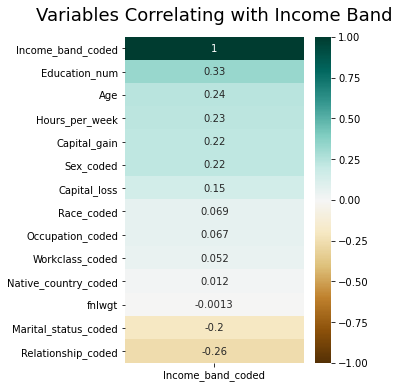

In [80]:
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(df.corr()[['Income_band_coded']].sort_values(by='Income_band_coded', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Variables Correlating with Income Band', fontdict={'fontsize':18}, pad=16);

<ipython-input-82-703a6a049a91>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
<ipython-input-82-703a6a049a91>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
<ipython-input-82-703a6a049a91>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to 

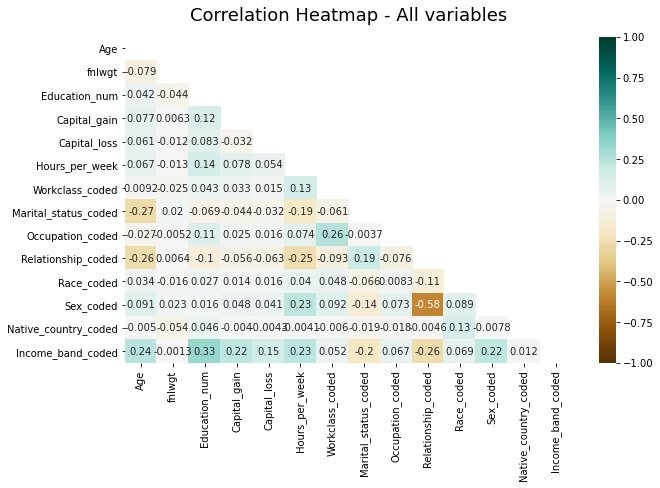

In [82]:

plt.figure(figsize=(10, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
#heatmap = sns.heatmap(df.corr(),vmin=-1, vmax=1,  annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap - All variables', fontdict={'fontsize':18}, pad=16);

In [107]:
%store df

Stored 'df' (DataFrame)


### Step: Check the statistical summary of the continuous variables to identify outliers

In [22]:
df[['Age','fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week']].describe()

,Age,fnlwgt,Capital_gain,Capital_loss,Hours_per_week
count,21815.000000,2.181500e+04,21815.000000,21815.000000,21815.000000
mean,38.585881,1.895368e+05,1092.752326,88.671006,40.388815
std,13.665339,1.047700e+05,7437.530811,406.303967,12.419577
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.176060e+05,0.000000,0.000000,40.000000
50%,37.000000,1.786860e+05,0.000000,0.000000,40.000000
75%,48.000000,2.375630e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


### Step 4: Implement Iterpretable ML models to the datase

In [96]:
#Reference: https://scikit-learn.org/
        
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix


In [74]:
def DecisionTree(X,Y,d): #d-Maxdepth
    regressor = DecisionTreeClassifier(criterion='entropy', max_depth=d).fit(X, Y)
    score = regressor.score(X,Y)
    prediction = regressor.predict(X)
    featImp = regressor.feature_importances_
    return score, prediction, featImp


# # Show prediction accuracies in scaled and unscaled data.
# print("\nPrediction accuracy for the Decision Tree of depth = 2")
# print(f"{accuracy_score(y_test, pred_test):.2%}\n")  

In [70]:
inp = df[['Workclass_coded', 'Marital_status_coded', 'Occupation_coded', 'Relationship_coded', 'Race_coded', 'Sex_coded', 'Native_country_coded']].values#.reshape(-1,1)
op = df['Income_band_coded'].values.reshape(-1,1)

inp = np.array(inp).reshape(21815,7)

In [75]:
DecisionTree(inp,op, 2)

(0.7735044694017877,
 array([1, 1, 0, ..., 0, 0, 1], dtype=int8),
 array([0.        , 0.        , 0.04092312, 0.95907688, 0.        ,
        0.        , 0.        ]))

In [101]:
# More appropriate than using Linear Regression because Logictice Regression gives class of solutions instead of just one fixed soltuion unlike Linear regression 
# Logictice Regression is better for binary predictions (here we have just 2 income bands, thus this algorithm is better)

## Refernce: https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1
# For Interpretability:
# odds = np.exp(logreg.coef_[0])
# pd.DataFrame(odds, 
#              X.columns, 
#              columns=['coef'])\  

# print("\nPrediction accuracy for the Decision Tree of depth = 5")
# print(f"{accuracy_score(y_test, pred_test_std):.2%}\n")

In [106]:
def LogisticRegressor(X,Y):     
    regressor = LogisticRegression(X,Y)
    regressor.fit(X,Y)
    score = regressor.score(X, Y)
    prediction = regressor.predict(X)
    weights = regressor.coef_#(Note: you will need to use .coef_[0] for logistic regression to put it into a dataframe.)
    return score, prediction, weights

LogisticRegressor(inp,op)

TypeError: LogisticRegression() got an unexpected keyword argument 'random_state'

Reference: https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1


Interpreting linear regression coefficients is fairly straightforward, “For every one-unit increase in [X variable], the [y variable] increases by [coefficient] when all other variables are held constant.”

However, logistic regression coefficients aren’t as easily interpreted. This is because logistic regression uses the logit link function to “bend” our line of best fit and convert our classification problem into a regression problem. (Again, learn more here.)

Because of the logit function, logistic regression coefficients represent the log odds that an observation is in the target class (“1”) given the values of its X variables. Thus, these log odd coefficients need to be converted to regular odds in order to make sense of them. Happily, this is done by simply exponentiating the log odds coefficients, which you can do with np.exp()

“For every one-unit increase in [X variable], the odds that the observation is in (y class) are [coefficient] times as large as the odds that the observation is not in (y class) when all other variables are held constant.”



Reference for Classification on Adult dataset: https://www.guru99.com/r-generalized-linear-model.html

How to Classify Adult dataset:

    Step 1: Check continuous variables
    Step 2: Check factor variables
    Step 3: Feature engineering
    Step 4: Summary statistic
    Step 5: Train/test set
    Step 6: Build the model
    Step 7: Assess the performance of the model
    step 8: Improve the model


### Compare the behaviour of causally correlated variable income-band vs other spurious variables like Education, Gender, Native-country etc

- Strategy is to 
1. First use non-sensitive variables like education, age, hours_per_week to forecast income-band
2. Then use sensitive variables like Sex, Native-Country, Race etc along with non-sensitive variables to check the bias
3. Use 'feature importance' property of decision trees to see how default weightage of each feature is. 

In [ ]:
# Case1: Checking fairness by unawareness i.e. removing sensitive variables
Case1 = df[['Education_num','Age','Hours_per_week']]

# Case2: Checking fairness with all information including sensitive variables 
Case2 = df.drop("Income_band_coded", axis=1)


### Sample Decision Trees wit multiple max_depths (2 and 5)

In [ ]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2, min_samples_split)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()